# Data Generation for the Rummy Pool

In [1]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')



number_of_players_in_pool = int(input('How many players do you want to have in the pool: '))
bet_multiplier_options = [0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200]
min_amount = [4, 8, 20, 40, 80, 160, 240, 400, 800, 1600, 3200, 6400, 10000, 16000]
bet_min = dict(zip(bet_multiplier_options, min_amount))
print(bet_min)

bet_multiplier_input = float(input("How much do you want the bet amount multiplier to be?\nChoose from the options - (0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200): "))
print(f"You have chosen the bet amount multiplier to be: {bet_multiplier_input}")

for key in bet_min.keys():
    if key == bet_multiplier_input:
        min_amt_required = float(bet_min[key])
        print("Minimum amount is:", min_amt_required)
        print(type(min_amt_required))
    else:
        continue
        print("Sorry, you have chosen a wrong bet amount multiplier, please try again by chosing one from the options mentioned here (0.05, 0.1, 0.25, 0.5, 1, 2, 3,5, 10, 20, 40, 80, 125, 200): ")

totalPlayers = {}
for i in range(number_of_players_in_pool):
    x = ''.join([random.choice(string.ascii_uppercase) for k in range(4)]).title()
    y = round(random.uniform(min_amt_required, (min_amt_required + 200)), 3)
    totalPlayers[x] = y

Sum = sum(totalPlayers.values())
print(f"The total amount involved in this pool is: {Sum}")
total_players_df = pd.DataFrame(totalPlayers.items(), columns=['Name', 'Balance in Rupees'])
print("The below table shows all the players in the pool along with their account balances.")
print(total_players_df)

total_amount_credited_to_app = 0
percentage_deduction = 15 / 100



matches_data = []

def matches():
    global total_amount_credited_to_app
    global matches_data

    eligible_players = {k: v for k, v in totalPlayers.items() if v >= min_amt_required}

    if len(eligible_players) < 2:
        print("Insufficient eligible players for a match.")
        return

    p1 = random.choice(list(eligible_players.items()))
    del eligible_players[p1[0]]
    p2 = random.choice(list(eligible_players.items()))

    match_data = {
        'Match Number':'',
        'Player 1': p1[0],
        'Player 2': p2[0],
        'Loser': '',
        'Winner': '',
        'Points Lost by Loser': '',
        'Amount Lost by Loser': '',
        'Amount Remaining for Loser': '',
        'Amount to be Credited to App': '',
        'Total Amount Earned by App': '',
        'Amount Won by Winner': '',
        'Amount Remaining for Winner': ''
    }
    
    match_data['Match Number'] = len(matches_data) + 1
    
    remaining_balances = totalPlayers.copy()
    for player, balance in remaining_balances.items():
        if player == match_data['Loser']:
            match_data[player] = totalPlayers[player] - (random.randint(2, 80) * bet_multiplier_input)
        elif player == match_data['Winner']:
            match_data[player] = totalPlayers[player] + (
                        totalPlayers[match_data['Loser']] * bet_multiplier_input * (100 - percentage_deduction) / 100)
        else:
            match_data[player] = balance
    
    for players, remaining_bal in totalPlayers.items():
        if players == match_data['Loser']:
            match_data[players] = amount_remaining_for_loser
        elif players == match_data['Winner']:
            match_data[players] == amount_remaining_for_winner
        else:
            match_data[players] == remaining_bal
    
    match_data['Loser'] = p1[0] if random.choice([p1, p2]) == p2 else p2[0]
    match_data['Winner'] = p1[0] if match_data['Loser'] == p2[0] else p2[0]

    points_lost = random.choice(range(2, 80))
    amount_deducted_from_loser = round(points_lost * bet_multiplier_input, 3)
    amount_remaining_for_loser = round(totalPlayers[match_data['Loser']] - amount_deducted_from_loser, 3)
    amount_credited_to_app = round(amount_deducted_from_loser * percentage_deduction, 3)
    total_amount_credited_to_app += amount_credited_to_app

    match_data['Points Lost by Loser'] = points_lost
    match_data['Amount Lost by Loser'] = amount_deducted_from_loser
    match_data['Amount Remaining for Loser'] = amount_remaining_for_loser
    match_data['Amount to be Credited to App'] = amount_credited_to_app
    match_data['Total Amount Earned by App'] = total_amount_credited_to_app

    amount_earnt_by_winner = round(amount_deducted_from_loser - amount_credited_to_app, 3)
    amount_remaining_for_winner = round(totalPlayers[match_data['Winner']] + amount_earnt_by_winner, 3)

    match_data['Amount Won by Winner'] = amount_earnt_by_winner
    match_data['Amount Remaining for Winner'] = amount_remaining_for_winner

    totalPlayers[match_data['Loser']] = amount_remaining_for_loser
    totalPlayers[match_data['Winner']] = amount_remaining_for_winner
    
    
    print(f"In this match we have : \n {p1} v/s {p2}")
    print(f'Where player 1 is : {p1}')
    print(f'and player 2 is : {p2}')
    
    print (f"The Winner is : {match_data['Winner']} ")
    print(f"And the loser is : {match_data['Loser']}  ")
    
    print(f"Points lost by loser - {match_data['Loser']}  is : \n {points_lost}")
    print(f"Amount lost by loser - {match_data['Loser']}  is : \n {amount_deducted_from_loser}")
    print (f"Amount remaining in the loser {match_data['Loser']}'s account is : \n {amount_remaining_for_loser}")
    (f"Amount won by winner {match_data['Winner']} is : \n {amount_earnt_by_winner}")
    print(f"Amount remaining in the winner {match_data['Winner']}'s account is : \n {amount_remaining_for_winner}")
    
    print(f"Amount to be credited to app is : \n {amount_credited_to_app}")
    print(f"Total amount earnt by app is : \n {total_amount_credited_to_app}")
    
    closing_balance_of_match = pd.DataFrame(totalPlayers.items(), columns=['Name', "Balance"])
    closing_balance_of_match.loc[closing_balance_of_match['Name'] == match_data['Loser'], 'Balance'] = amount_remaining_for_loser
    closing_balance_of_match.loc[closing_balance_of_match['Name'] == match_data['Winner'], 'Balance'] = amount_remaining_for_winner
    print(f"The closing balance of this match is \n {closing_balance_of_match}")

   
    matches_data.append(match_data)

counter = len(totalPlayers)
print(counter)
match = 0

while counter > 1:
    matches()
    match += 1
    print(f"Match {match} concluded")
    print("-" * 120)
    counter = sum(1 for amount in totalPlayers.values() if amount >= min_amt_required)

matches_df = pd.DataFrame(matches_data)



How many players do you want to have in the pool: 10
{0.05: 4, 0.1: 8, 0.25: 20, 0.5: 40, 1: 80, 2: 160, 3: 240, 5: 400, 10: 800, 20: 1600, 40: 3200, 80: 6400, 125: 10000, 200: 16000}
How much do you want the bet amount multiplier to be?
Choose from the options - (0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200): .05
You have chosen the bet amount multiplier to be: 0.05
Minimum amount is: 4.0
<class 'float'>
The total amount involved in this pool is: 1006.655
The below table shows all the players in the pool along with their account balances.
   Name  Balance in Rupees
0  Vkfv             68.825
1  Ovti            119.953
2  Ayus             83.427
3  Wvlh             23.269
4  Isba            199.321
5  Zxyw            170.954
6  Vlbz             87.724
7  Kyao            126.764
8  Lizd             14.454
9  Ithn            111.964
10
In this match we have : 
 ('Vlbz', 87.724) v/s ('Isba', 199.321)
Where player 1 is : ('Vlbz', 87.724)
and player 2 is : ('Isba', 199.321)
Th

In [2]:
list(totalPlayers.keys())

['Vkfv',
 'Ovti',
 'Ayus',
 'Wvlh',
 'Isba',
 'Zxyw',
 'Vlbz',
 'Kyao',
 'Lizd',
 'Ithn']

In [3]:
matches_df

Match Number Player 1 Player 2 Loser Winner  Points Lost by Loser  \
0                1     Vlbz     Isba  Vlbz   Isba                    43   
1                2     Ovti     Vlbz  Vlbz   Ovti                    20   
2                3     Zxyw     Lizd  Lizd   Zxyw                    47   
3                4     Zxyw     Wvlh  Zxyw   Wvlh                    60   
4                5     Vkfv     Vlbz  Vkfv   Vlbz                    51   
...            ...      ...      ...   ...    ...                   ...   
2940          2941     Zxyw     Isba  Zxyw   Isba                    67   
2941          2942     Isba     Zxyw  Zxyw   Isba                    22   
2942          2943     Zxyw     Isba  Isba   Zxyw                    44   
2943          2944     Isba     Zxyw  Zxyw   Isba                     5   
2944          2945     Isba     Zxyw  Zxyw   Isba                    49   

      Amount Lost by Loser  Amount Remaining for Loser  \
0                     2.15                      85.574   
1                     1.00                      84.574   
2                     2.35                      12.104   
3                     3.00                     169.952   
4                     2.55                      66.275   
...                    ...                         ...   
2940                  3.35                       5.453   
2941                  1.10                       4.353   
2942                  2.20                      84.111   
2943                  0.25                       5.973   
2944                  2.45                       3.523   

      Amount to be Credited to App  Total Amount Earned by App  ...    Vkfv  \
0                            0.322                       0.322  ...  68.825   
1                            0.150                       0.472  ...  68.825   
2                            0.352                       0.824  ...  68.825   
3                            0.450                       1.274  ...  68.825   
4                            0.382                       1.656  ...  68.825   
...                            ...                         ...  ...     ...   
2940                         0.502                     890.994  ...   3.485   
2941                         0.165                     891.159  ...   3.485   
2942                         0.330                     891.489  ...   3.485   
2943                         0.037                     891.526  ...   3.485   
2944                         0.367                     891.893  ...   3.485   

         Ovti    Ayus    Wvlh     Isba     Zxyw    Vlbz     Kyao    Lizd  \
0     119.953  83.427  23.269  199.321  170.954  87.724  126.764  14.454   
1     119.953  83.427  23.269  201.149  170.954  85.574  126.764  14.454   
2     120.803  83.427  23.269  201.149  170.954  84.574  126.764  14.454   
3     120.803  83.427  23.269  201.149  172.952  84.574  126.764  12.104   
4     120.803  83.427  25.819  201.149  169.952  84.574  126.764  12.104   
...       ...     ...     ...      ...      ...     ...      ...     ...   
2940    3.849   3.878   3.594   82.528    8.803   1.429    3.943   2.052   
2941    3.849   3.878   3.594   85.376    5.453   1.429    3.943   2.052   
2942    3.849   3.878   3.594   86.311    4.353   1.429    3.943   2.052   
2943    3.849   3.878   3.594   84.111    6.223   1.429    3.943   2.052   
2944    3.849   3.878   3.594   84.324    5.973   1.429    3.943   2.052   

         Ithn  
0     111.964  
1     111.964  
2     111.964  
3     111.964  
4     111.964  
...       ...  
2940    2.602  
2941    2.602  
2942    2.602  
2943    2.602  
2944    2.602  

[2945 rows x 22 columns]

In [4]:
matches_df.to_excel('Rummy.xlsx', index=False, engine='openpyxl')

In [5]:
App = matches_df['Total Amount Earned by App']
col_names = matches_df.columns

In [6]:
col_names

Index(['Match Number', 'Player 1', 'Player 2', 'Loser', 'Winner',
       'Points Lost by Loser', 'Amount Lost by Loser',
       'Amount Remaining for Loser', 'Amount to be Credited to App',
       'Total Amount Earned by App', 'Amount Won by Winner',
       'Amount Remaining for Winner', 'Vkfv', 'Ovti', 'Ayus', 'Wvlh', 'Isba',
       'Zxyw', 'Vlbz', 'Kyao', 'Lizd', 'Ithn'],
      dtype='object')

### Visualization of player's and app's flow of balances

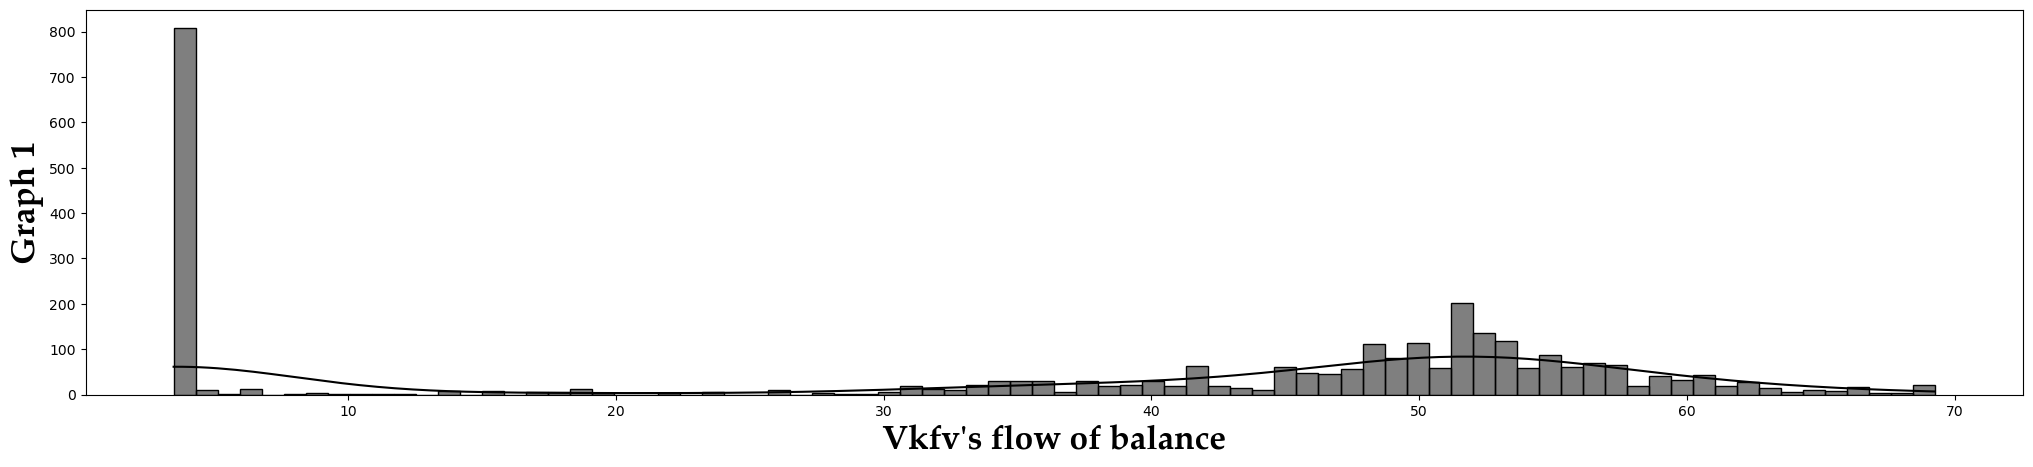

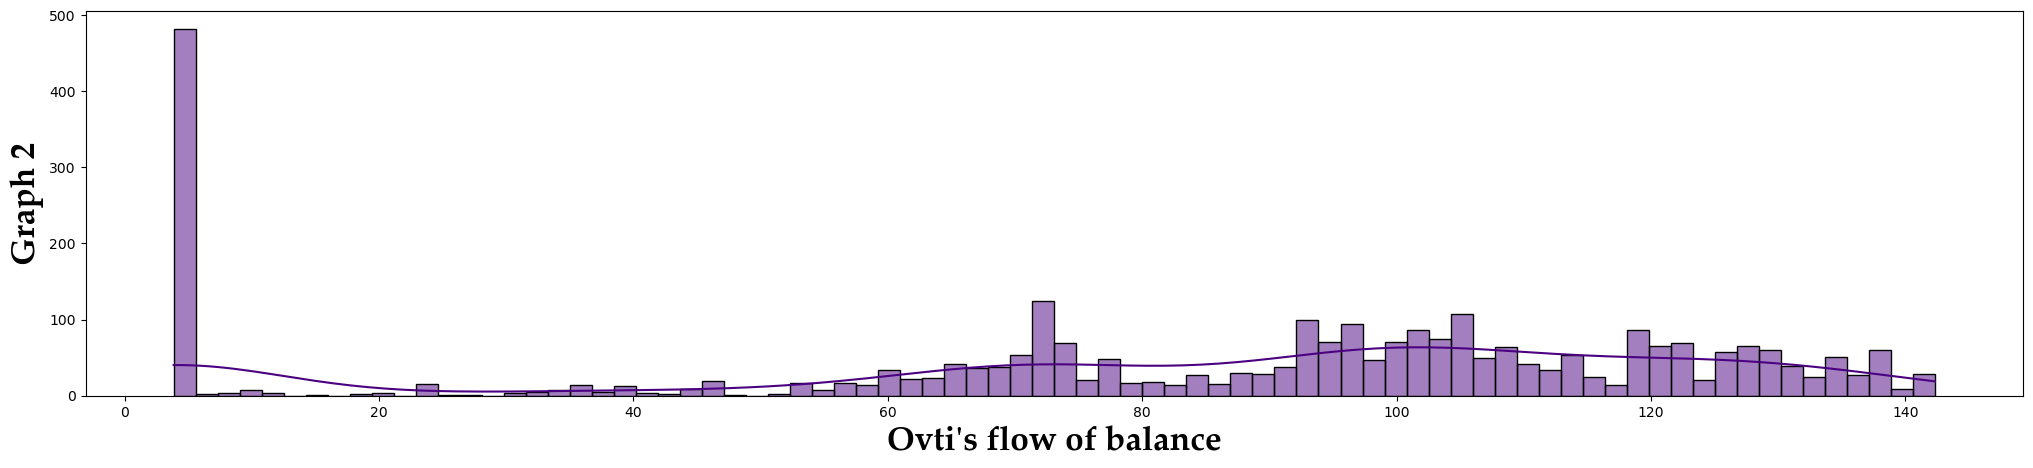

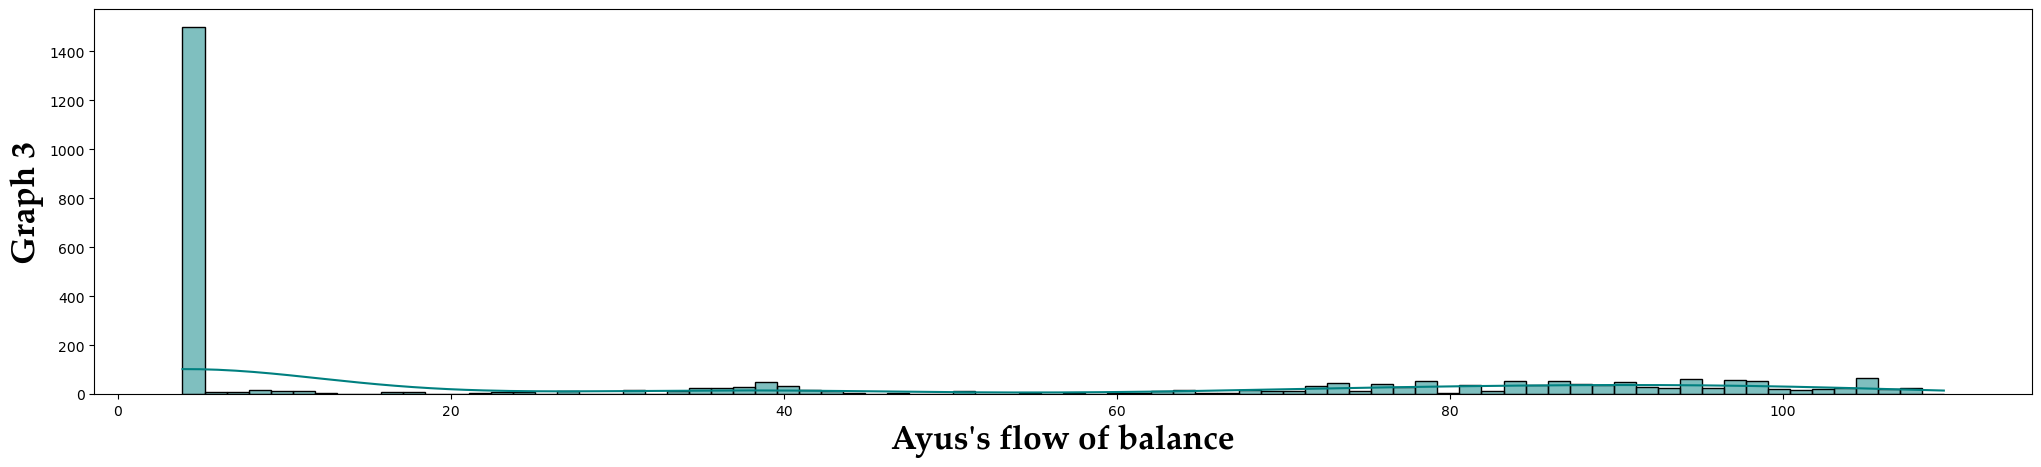

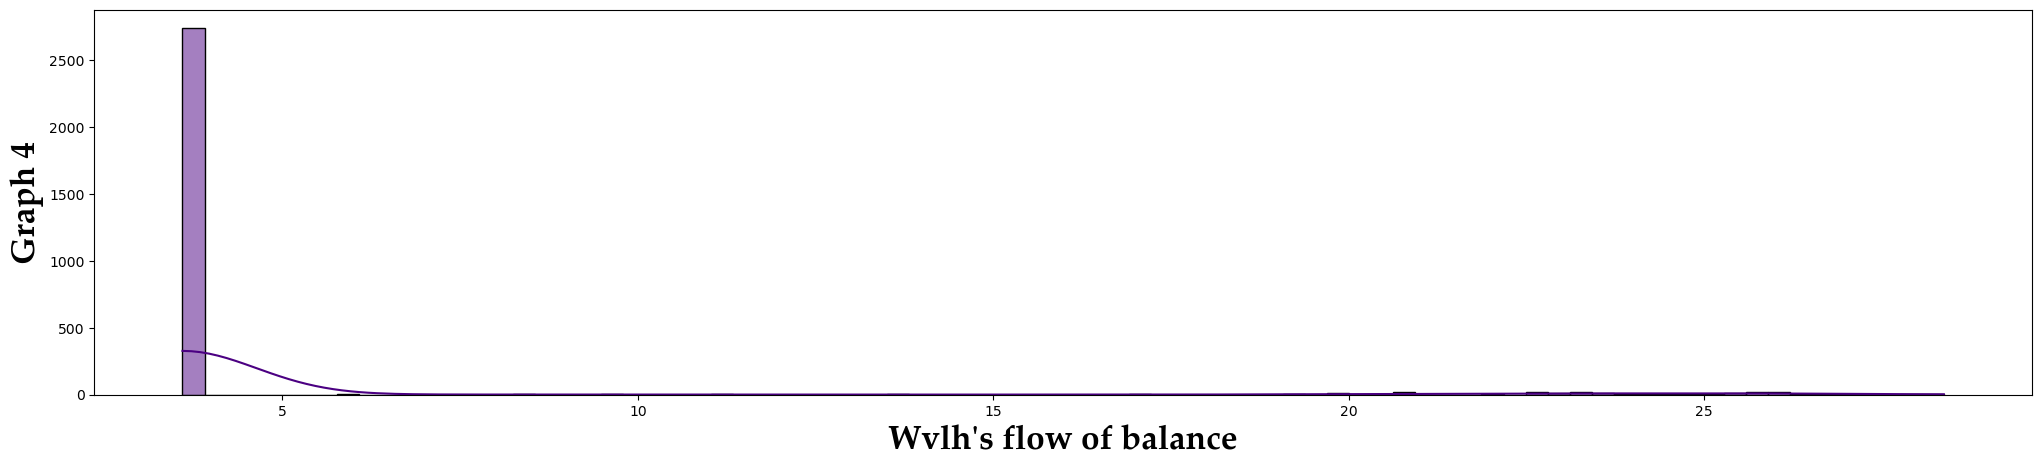

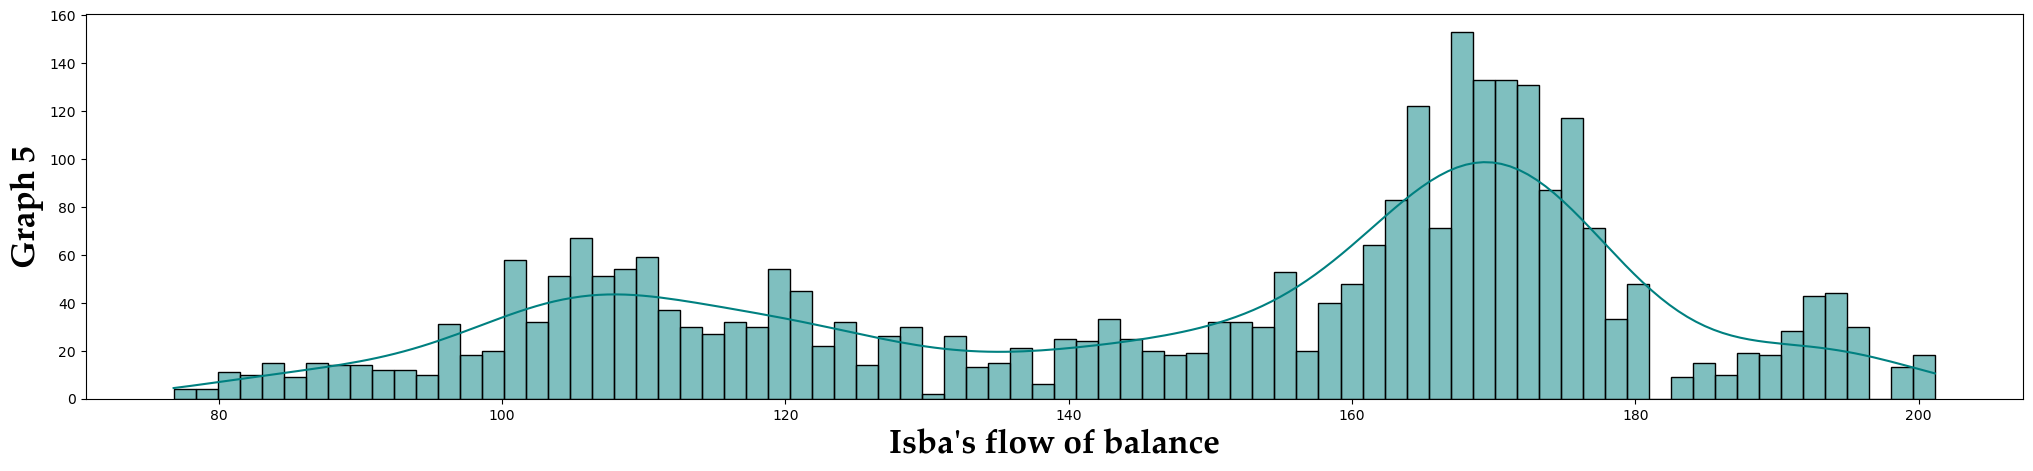

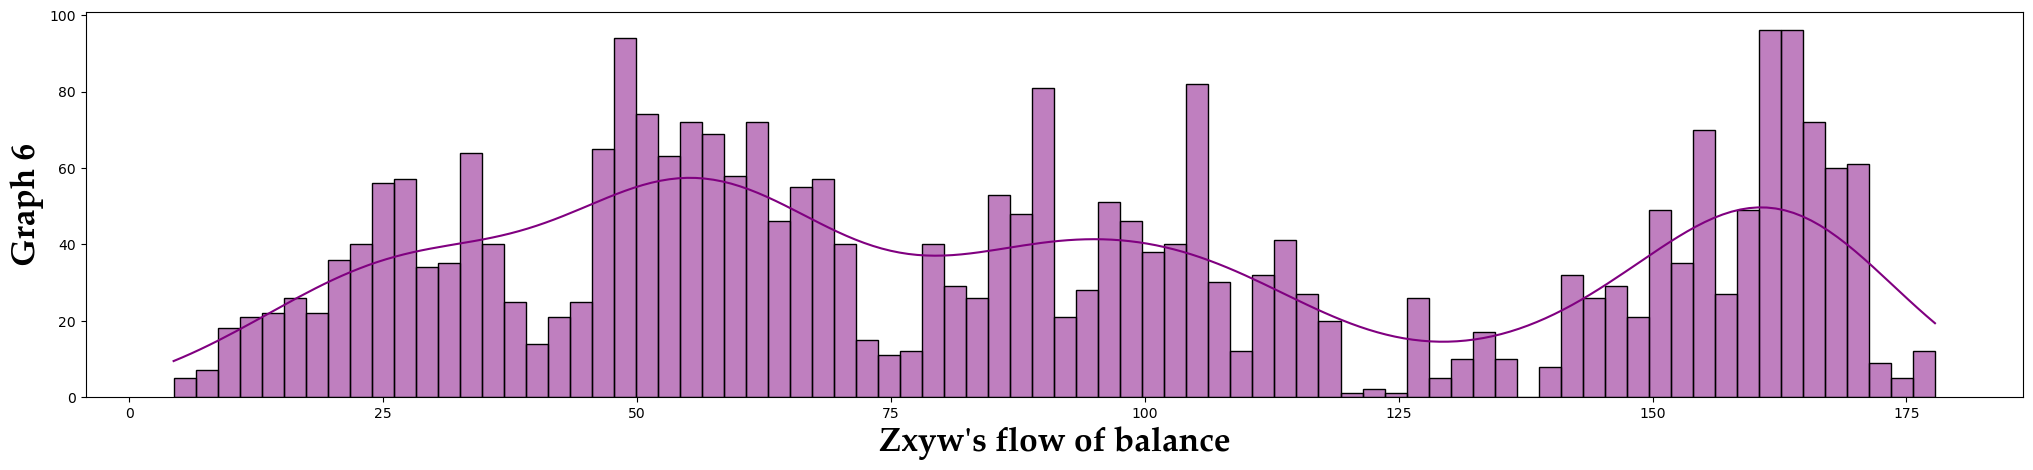

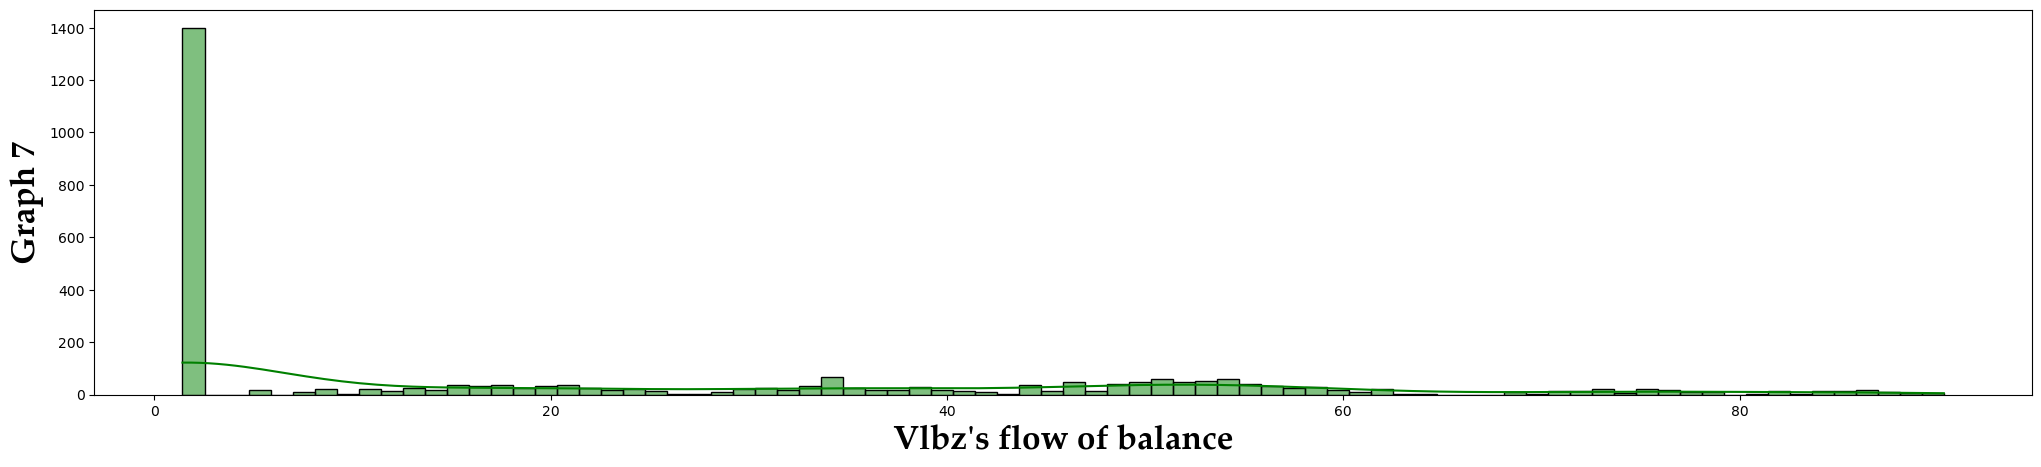

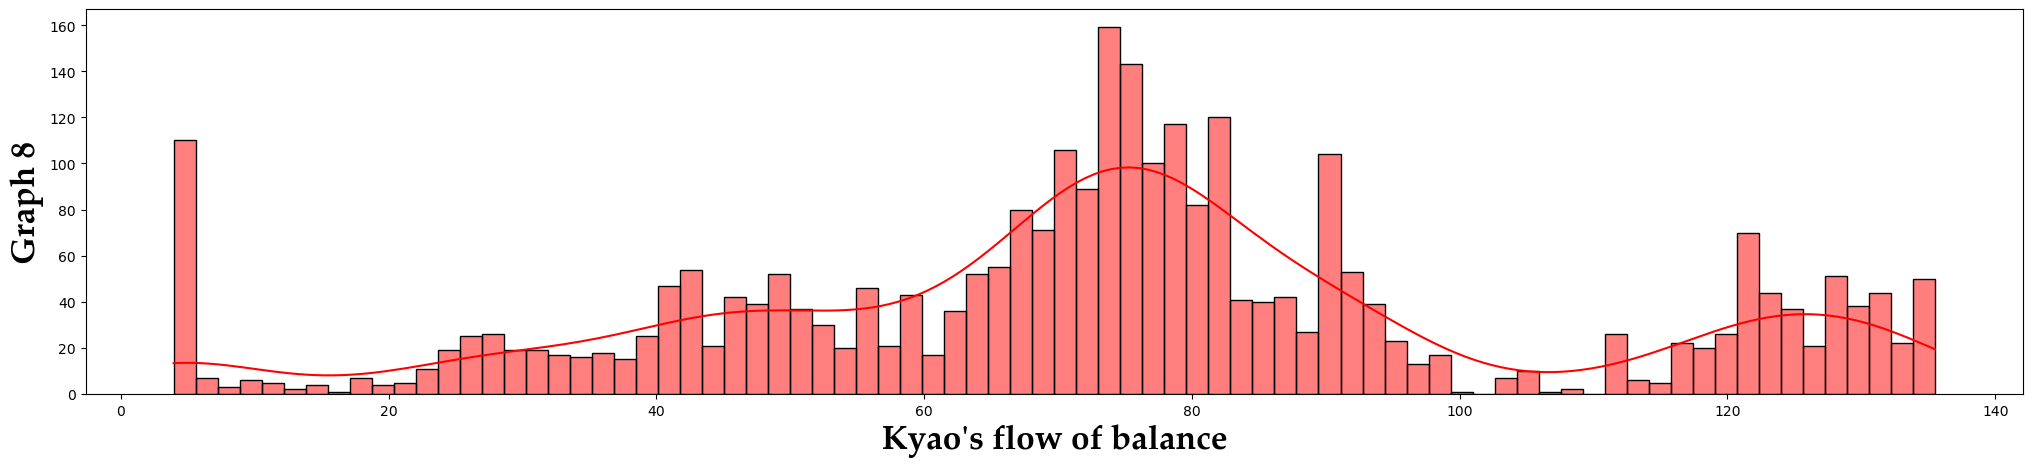

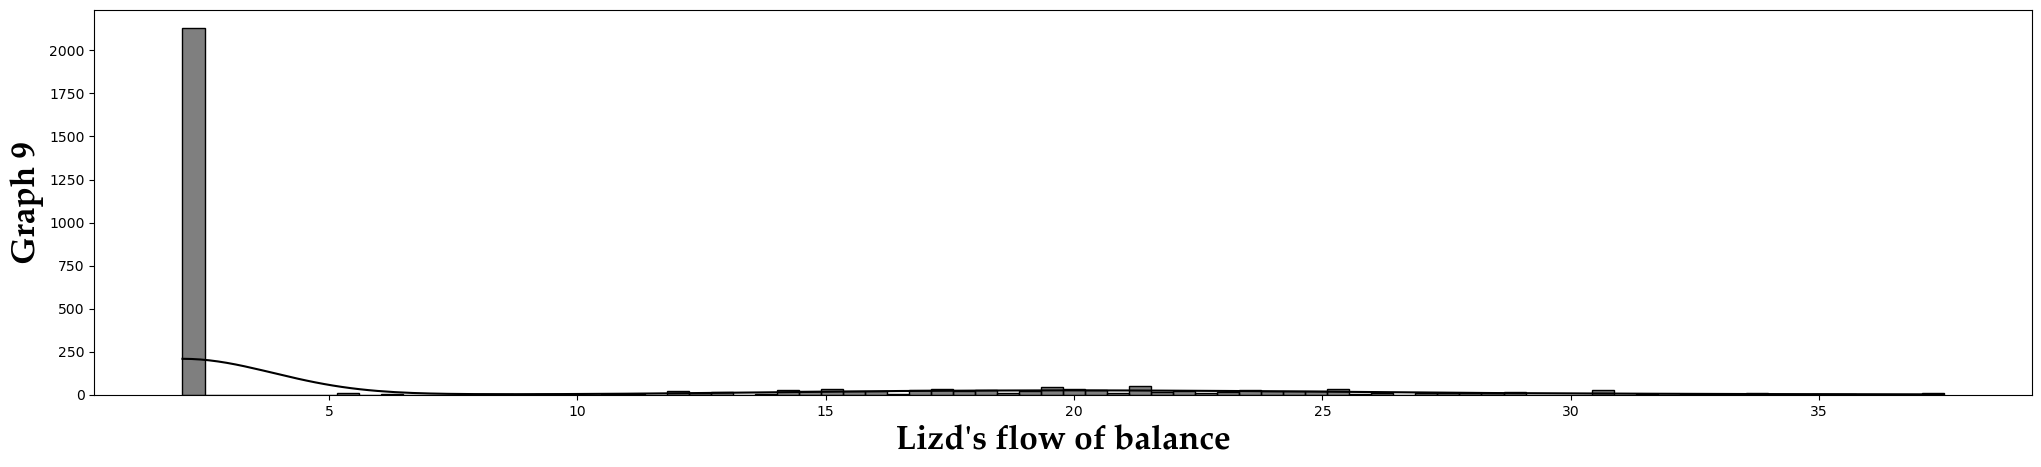

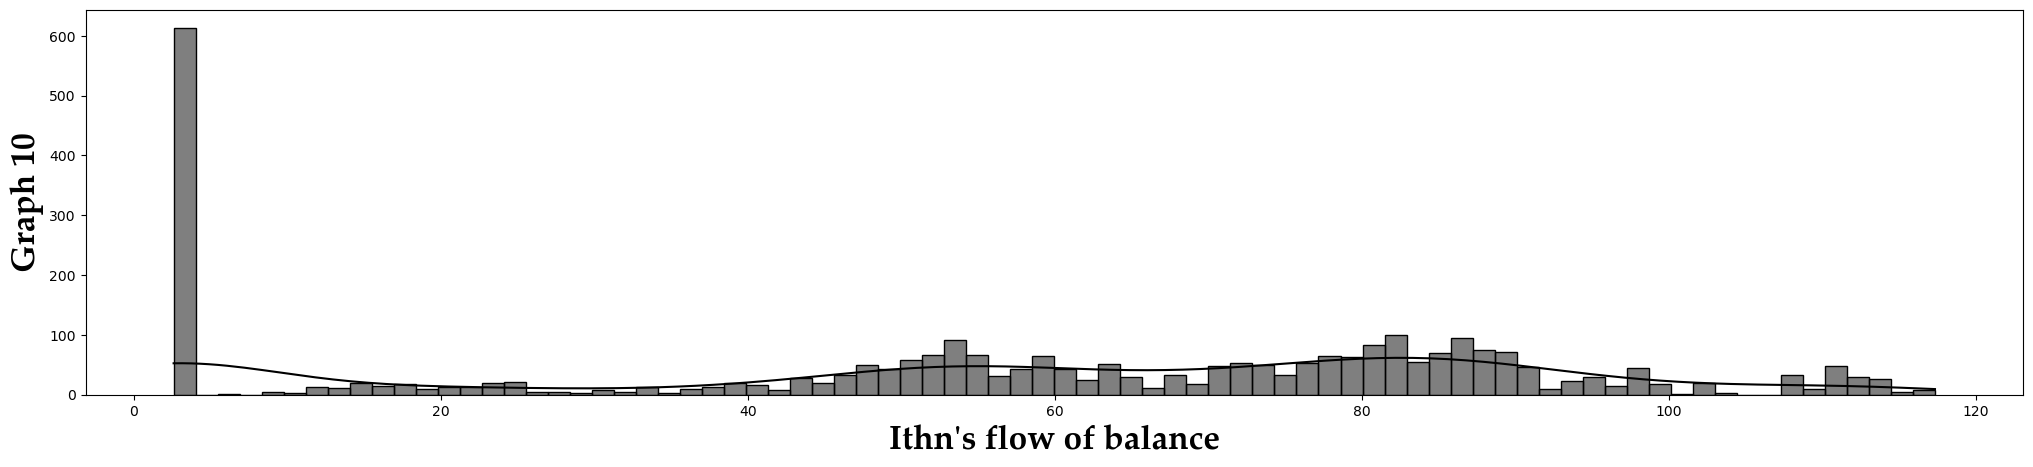

In [7]:
font = {'size':24, 'family':'Palatino Linotype', 'weight':'bold'}
for i in range(number_of_players_in_pool):
    plt.figure(figsize=(25,5))
    plott = sns.histplot(matches_df.iloc[:,12+i], kde=True, bins=80, color= random.choice(['r', 'g','b','k','yellow','black','indigo','teal','purple','brown']))
    plt.xlabel(f"{col_names[12+i]}'s flow of balance", fontdict=font)
    plt.ylabel(f"Graph {i+1}", fontdict=font)
    plt.show()
    i += 1

Text(0, 0.5, 'Count')

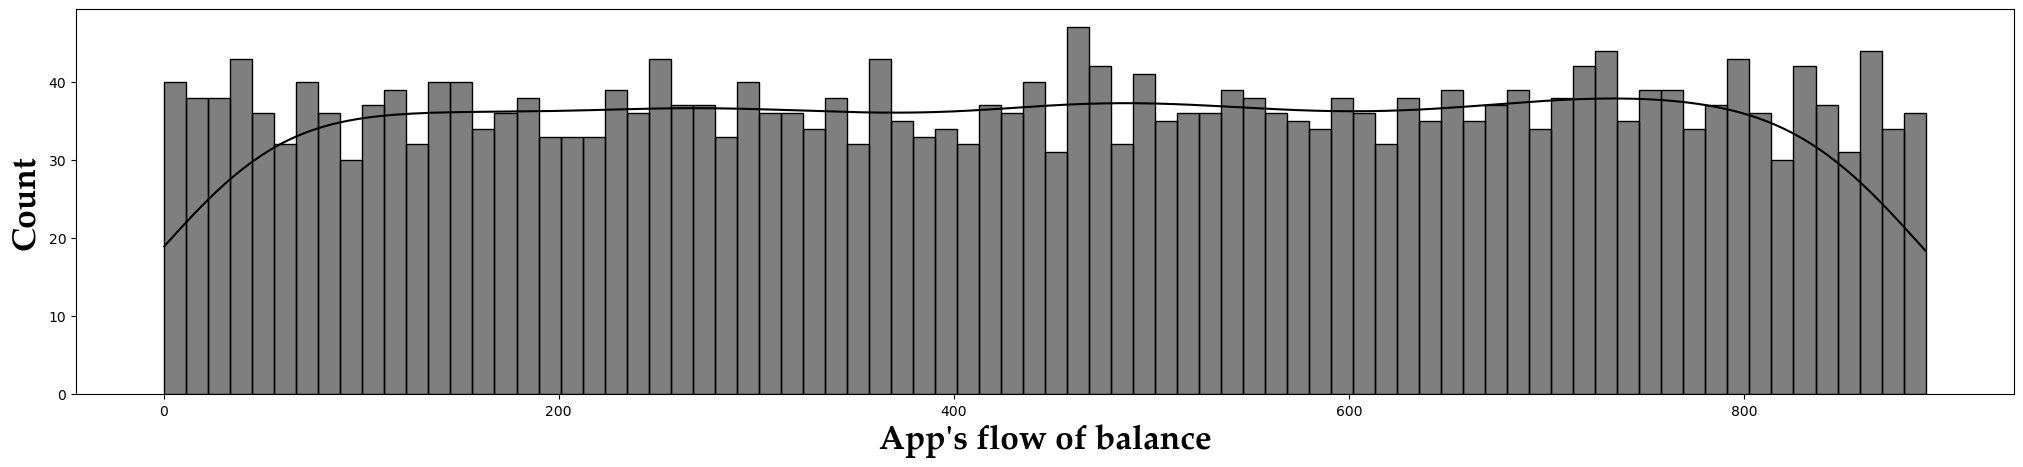

In [8]:
plt.figure(figsize=(25,5))
sns.histplot(matches_df.iloc[:,9], kde=True, bins=80, color='black')
plt.xlabel("App's flow of balance", fontdict=font)
plt.ylabel("Count", fontdict=font)

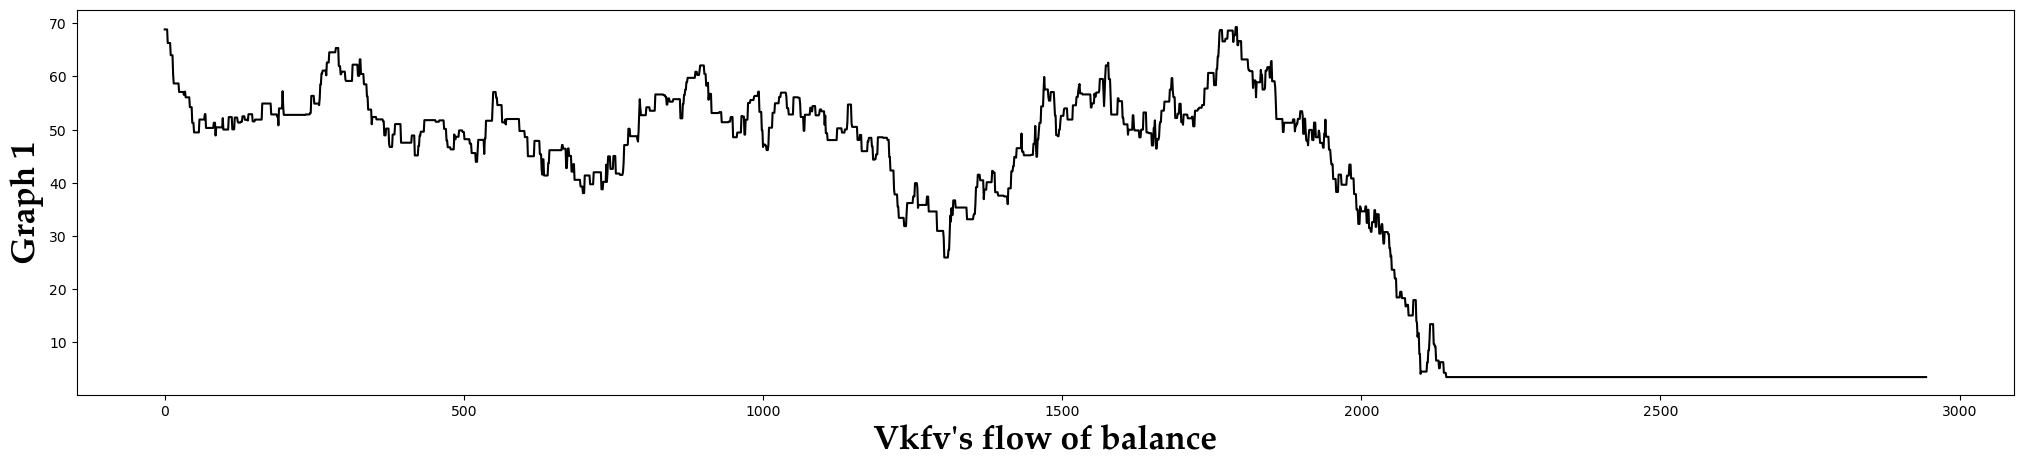

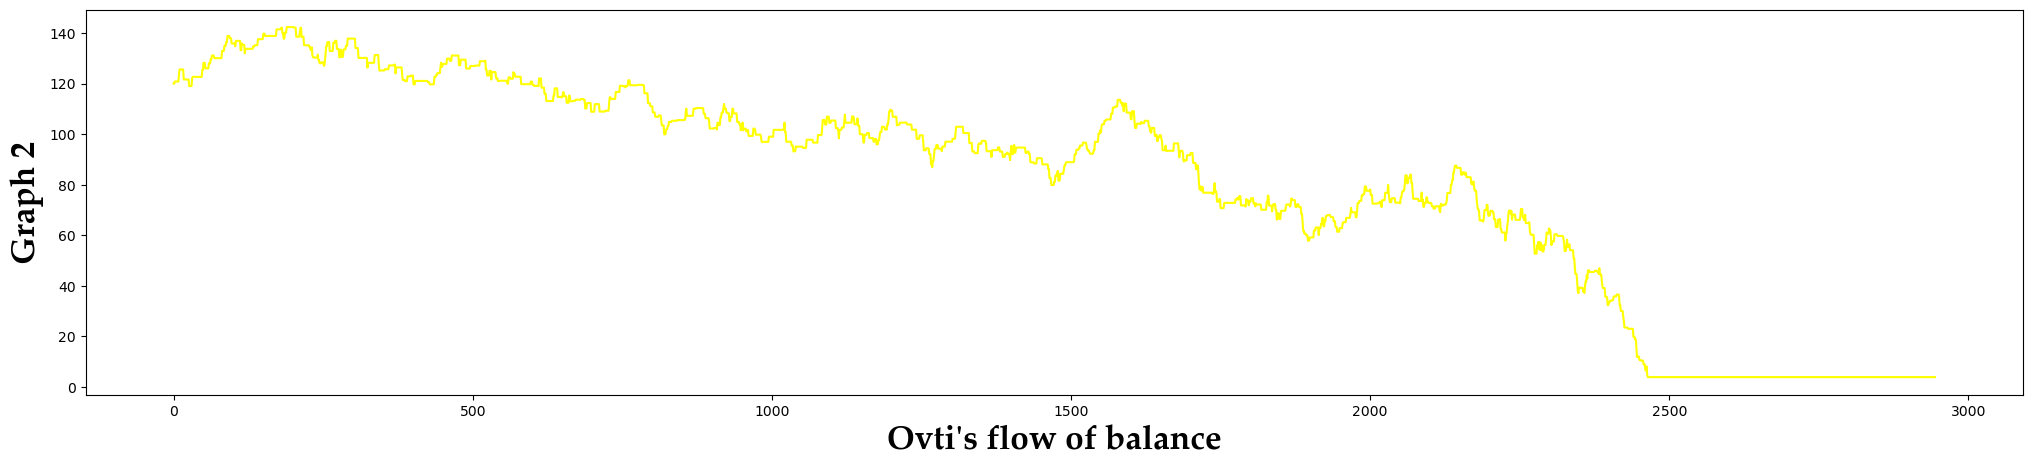

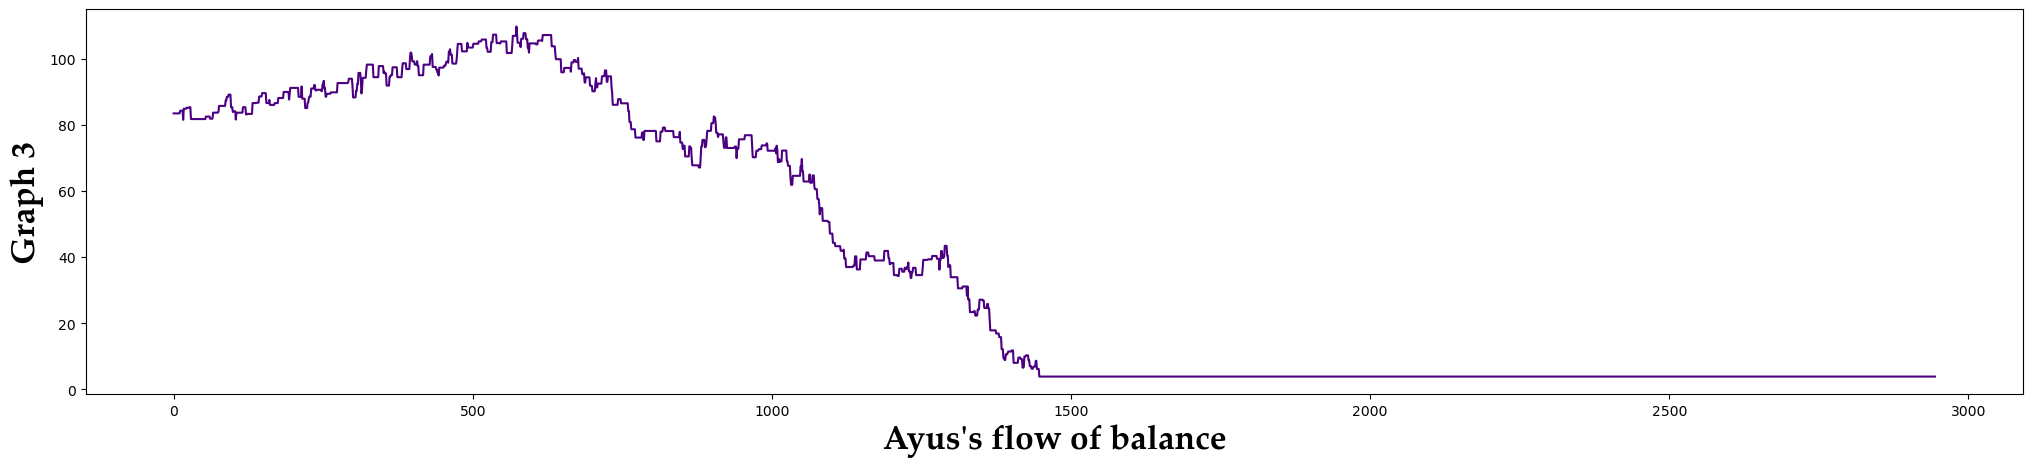

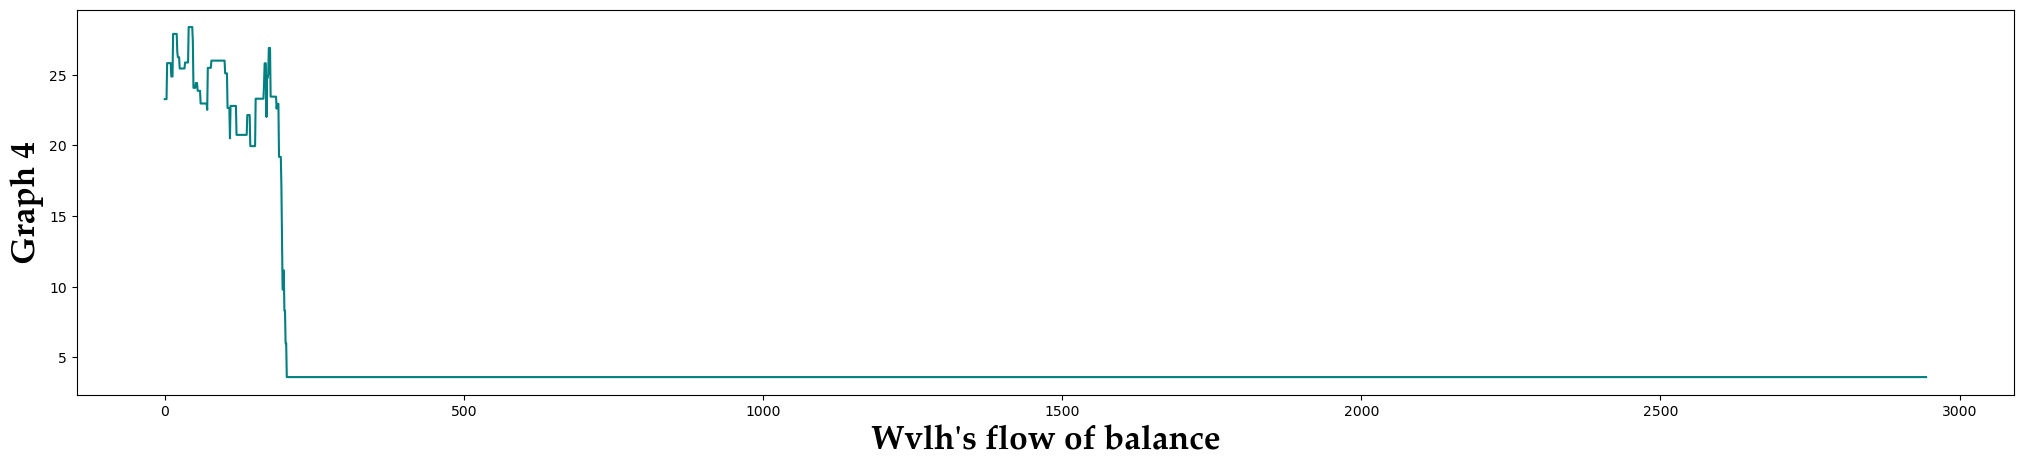

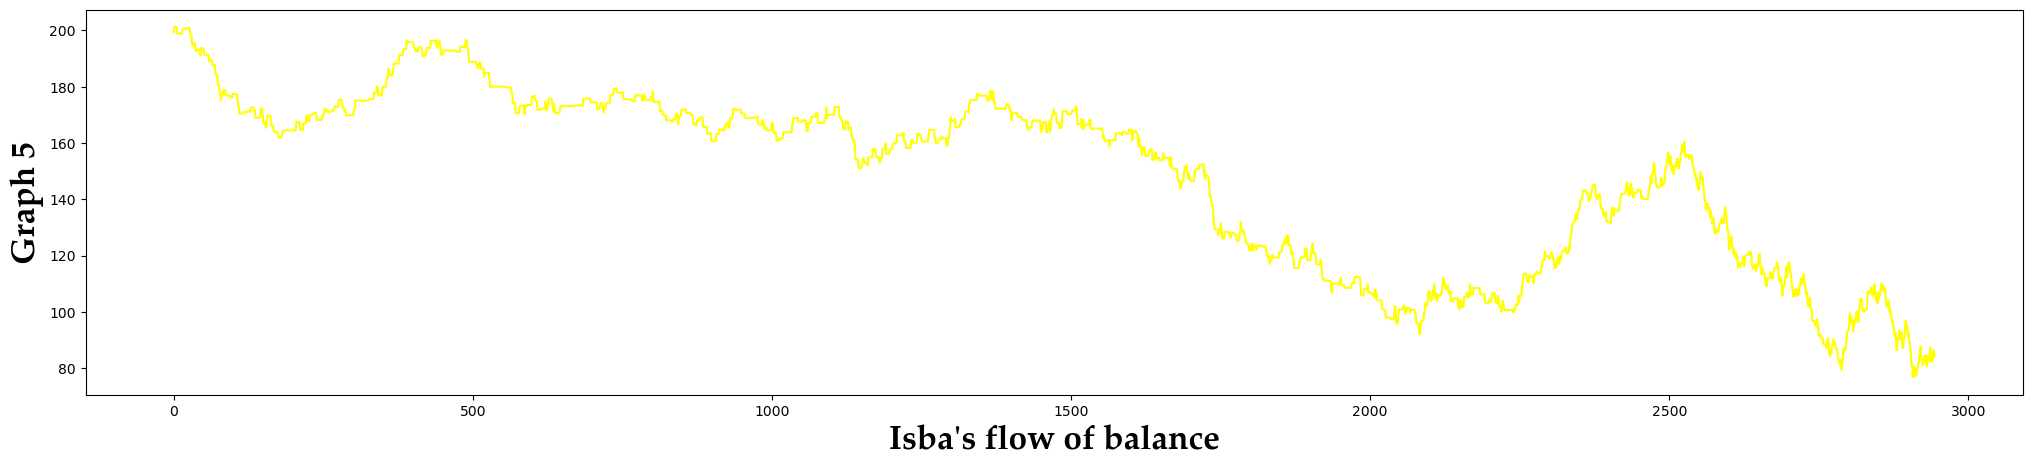

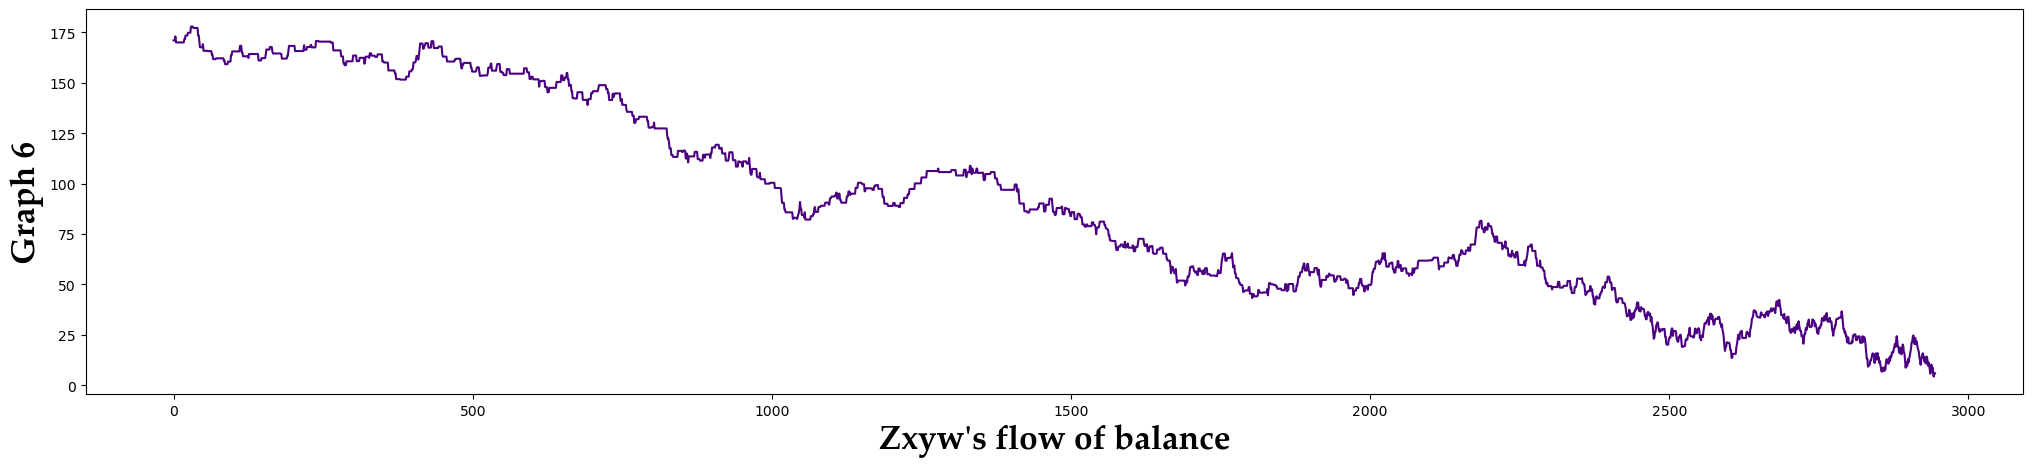

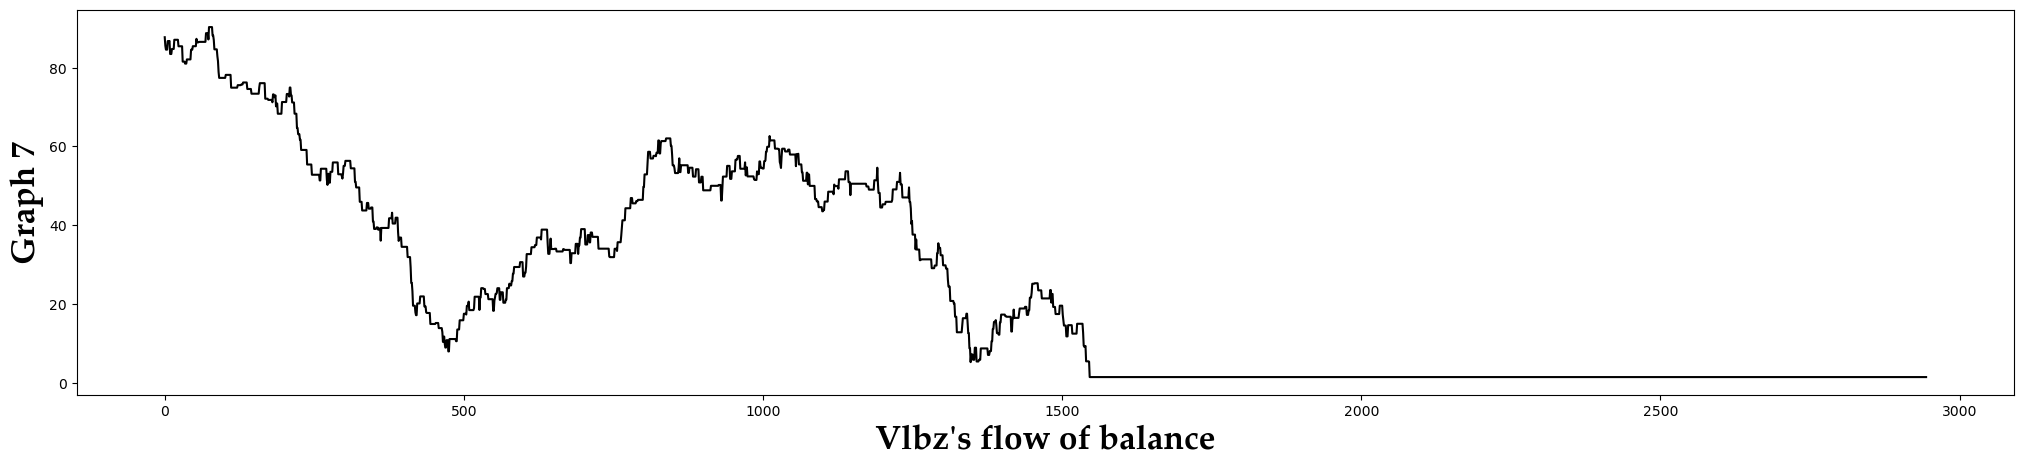

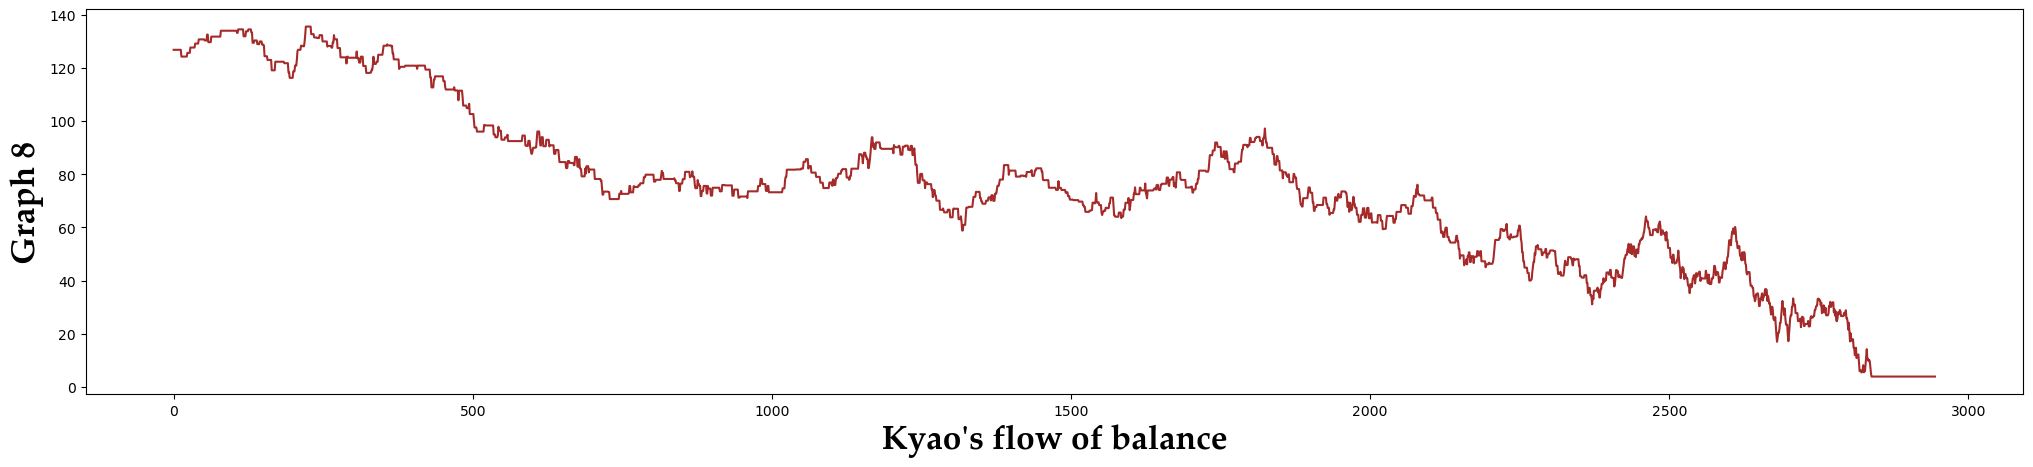

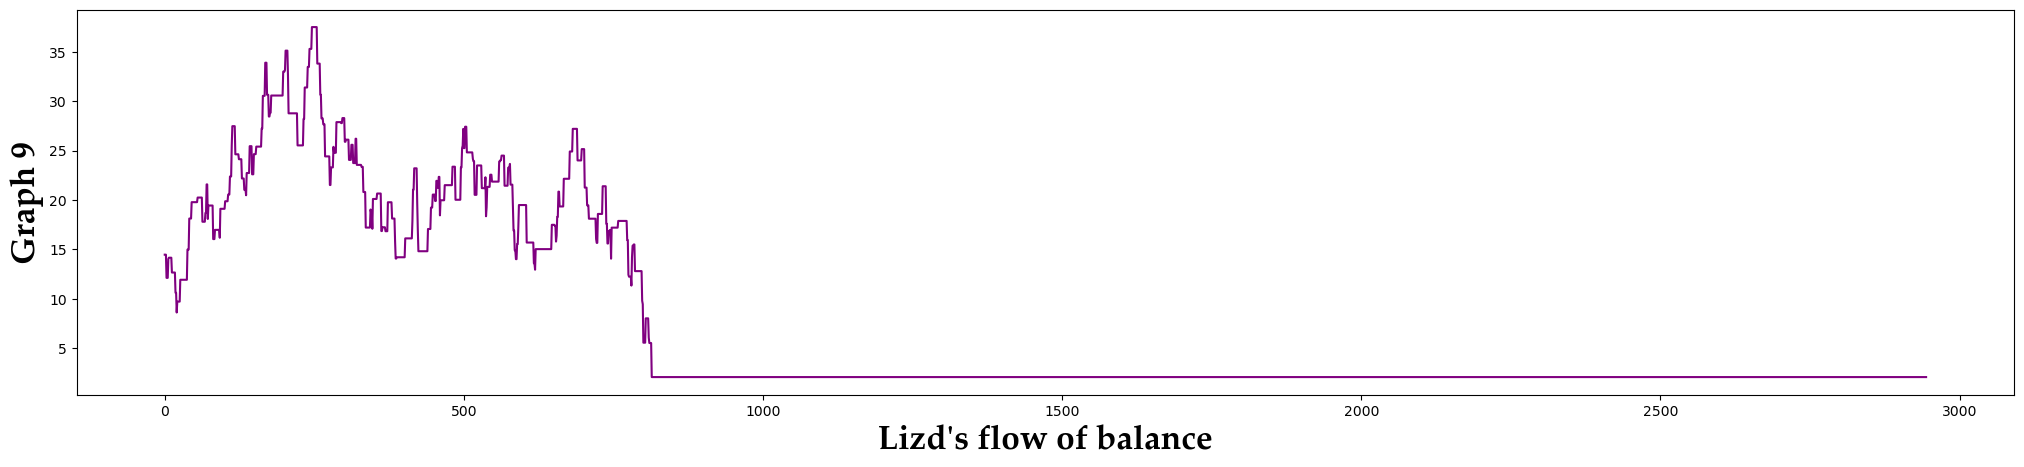

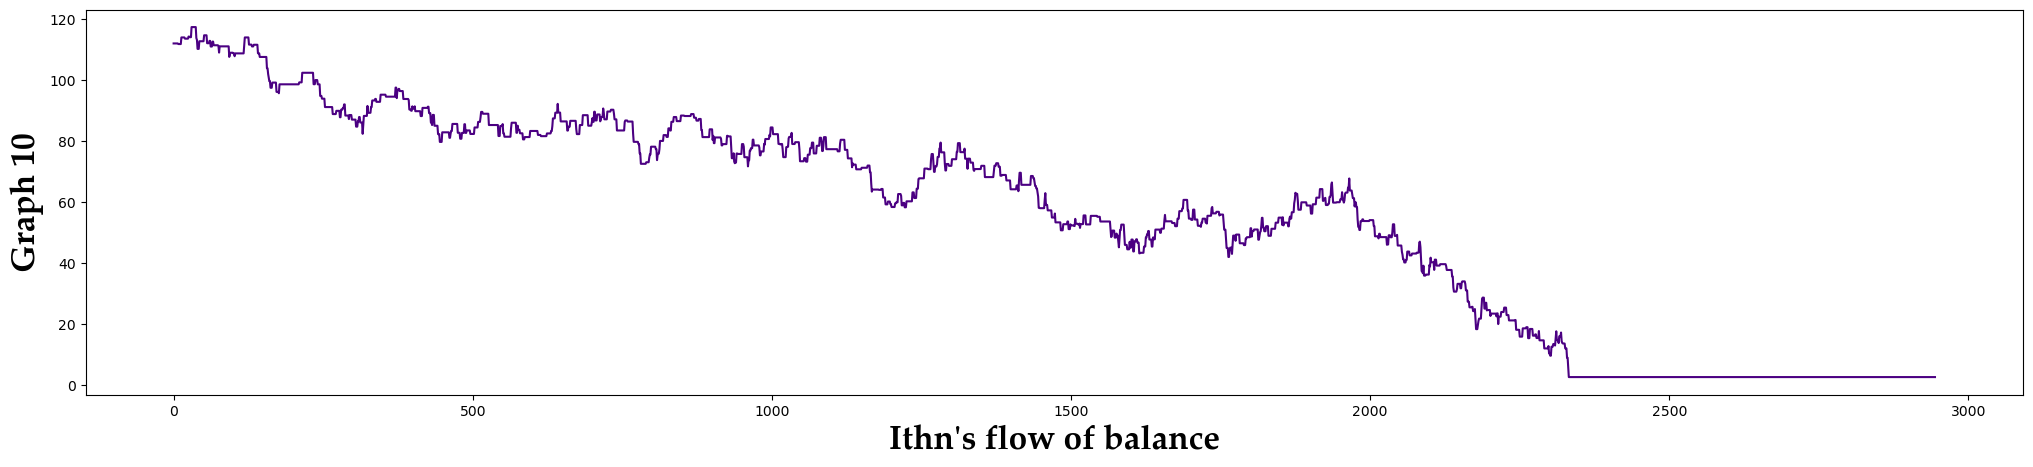

In [9]:
for i in range(number_of_players_in_pool):
    plt.figure(figsize=(25,5))
    matches_df.iloc[:,12+i].plot(kind='line', color= random.choice(['r', 'g','b','k','yellow','black','indigo','teal','purple','brown']))
    plt.xlabel(f"{col_names[12+i]}'s flow of balance", fontdict=font)
    plt.ylabel(f"Graph {i+1}", fontdict=font)
    plt.show()
    i += 1

Text(0, 0.5, 'Count')

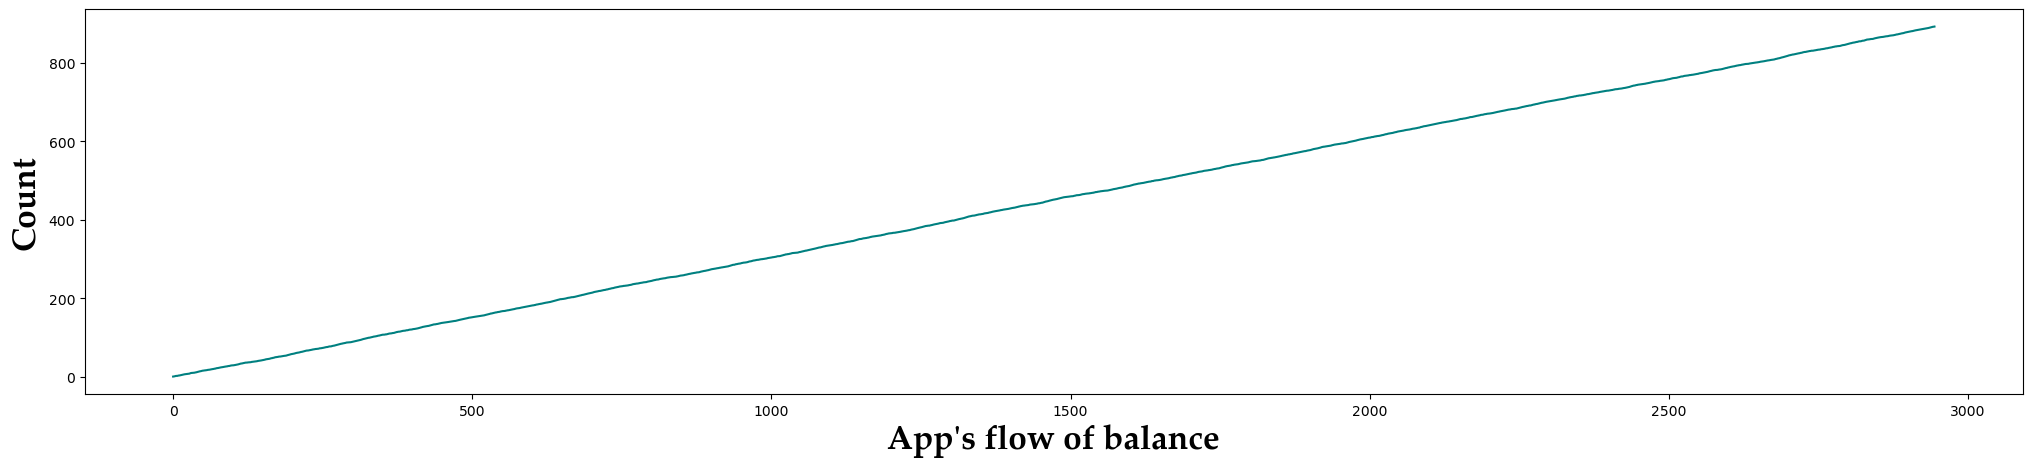

In [10]:
plt.figure(figsize=(25,5))
matches_df['Total Amount Earned by App'].plot(kind='line', color='teal')
plt.xlabel("App's flow of balance", fontdict=font)
plt.ylabel("Count", fontdict=font)

### Linear Regression model preparation

In [11]:
pd.set_option('display.max_rows',100)
matches_df.isnull().sum()

Match Number                    0
Player 1                        0
Player 2                        0
Loser                           0
Winner                          0
Points Lost by Loser            0
Amount Lost by Loser            0
Amount Remaining for Loser      0
Amount to be Credited to App    0
Total Amount Earned by App      0
Amount Won by Winner            0
Amount Remaining for Winner     0
Vkfv                            0
Ovti                            0
Ayus                            0
Wvlh                            0
Isba                            0
Zxyw                            0
Vlbz                            0
Kyao                            0
Lizd                            0
Ithn                            0
dtype: int64

In [12]:
predictor = matches_df.drop('Total Amount Earned by App', axis=1)

In [13]:
pd.set_option('display.max_rows',100)
predictor

Match Number Player 1 Player 2 Loser Winner  Points Lost by Loser  \
0                1     Vlbz     Isba  Vlbz   Isba                    43   
1                2     Ovti     Vlbz  Vlbz   Ovti                    20   
2                3     Zxyw     Lizd  Lizd   Zxyw                    47   
3                4     Zxyw     Wvlh  Zxyw   Wvlh                    60   
4                5     Vkfv     Vlbz  Vkfv   Vlbz                    51   
...            ...      ...      ...   ...    ...                   ...   
2940          2941     Zxyw     Isba  Zxyw   Isba                    67   
2941          2942     Isba     Zxyw  Zxyw   Isba                    22   
2942          2943     Zxyw     Isba  Isba   Zxyw                    44   
2943          2944     Isba     Zxyw  Zxyw   Isba                     5   
2944          2945     Isba     Zxyw  Zxyw   Isba                    49   

      Amount Lost by Loser  Amount Remaining for Loser  \
0                     2.15                      85.574   
1                     1.00                      84.574   
2                     2.35                      12.104   
3                     3.00                     169.952   
4                     2.55                      66.275   
...                    ...                         ...   
2940                  3.35                       5.453   
2941                  1.10                       4.353   
2942                  2.20                      84.111   
2943                  0.25                       5.973   
2944                  2.45                       3.523   

      Amount to be Credited to App  Amount Won by Winner  ...    Vkfv  \
0                            0.322                 1.828  ...  68.825   
1                            0.150                 0.850  ...  68.825   
2                            0.352                 1.998  ...  68.825   
3                            0.450                 2.550  ...  68.825   
4                            0.382                 2.168  ...  68.825   
...                            ...                   ...  ...     ...   
2940                         0.502                 2.848  ...   3.485   
2941                         0.165                 0.935  ...   3.485   
2942                         0.330                 1.870  ...   3.485   
2943                         0.037                 0.213  ...   3.485   
2944                         0.367                 2.083  ...   3.485   

         Ovti    Ayus    Wvlh     Isba     Zxyw    Vlbz     Kyao    Lizd  \
0     119.953  83.427  23.269  199.321  170.954  87.724  126.764  14.454   
1     119.953  83.427  23.269  201.149  170.954  85.574  126.764  14.454   
2     120.803  83.427  23.269  201.149  170.954  84.574  126.764  14.454   
3     120.803  83.427  23.269  201.149  172.952  84.574  126.764  12.104   
4     120.803  83.427  25.819  201.149  169.952  84.574  126.764  12.104   
...       ...     ...     ...      ...      ...     ...      ...     ...   
2940    3.849   3.878   3.594   82.528    8.803   1.429    3.943   2.052   
2941    3.849   3.878   3.594   85.376    5.453   1.429    3.943   2.052   
2942    3.849   3.878   3.594   86.311    4.353   1.429    3.943   2.052   
2943    3.849   3.878   3.594   84.111    6.223   1.429    3.943   2.052   
2944    3.849   3.878   3.594   84.324    5.973   1.429    3.943   2.052   

         Ithn  
0     111.964  
1     111.964  
2     111.964  
3     111.964  
4     111.964  
...       ...  
2940    2.602  
2941    2.602  
2942    2.602  
2943    2.602  
2944    2.602  

[2945 rows x 21 columns]

In [14]:
target = matches_df[['Total Amount Earned by App']]
target

Total Amount Earned by App
0                          0.322
1                          0.472
2                          0.824
3                          1.274
4                          1.656
...                          ...
2940                     890.994
2941                     891.159
2942                     891.489
2943                     891.526
2944                     891.893

[2945 rows x 1 columns]

In [15]:
cat_cols = [col for col in predictor.columns.values if predictor[col].dtype == 'object']

In [16]:
predictor_num = predictor.drop('Match Number',axis=1)

In [17]:
predictor_num = predictor_num.drop(cat_cols, axis=1)
predictor_num

Points Lost by Loser  Amount Lost by Loser  Amount Remaining for Loser  \
0                       43                  2.15                      85.574   
1                       20                  1.00                      84.574   
2                       47                  2.35                      12.104   
3                       60                  3.00                     169.952   
4                       51                  2.55                      66.275   
...                    ...                   ...                         ...   
2940                    67                  3.35                       5.453   
2941                    22                  1.10                       4.353   
2942                    44                  2.20                      84.111   
2943                     5                  0.25                       5.973   
2944                    49                  2.45                       3.523   

      Amount to be Credited to App  Amount Won by Winner  \
0                            0.322                 1.828   
1                            0.150                 0.850   
2                            0.352                 1.998   
3                            0.450                 2.550   
4                            0.382                 2.168   
...                            ...                   ...   
2940                         0.502                 2.848   
2941                         0.165                 0.935   
2942                         0.330                 1.870   
2943                         0.037                 0.213   
2944                         0.367                 2.083   

      Amount Remaining for Winner    Vkfv     Ovti    Ayus    Wvlh     Isba  \
0                         201.149  68.825  119.953  83.427  23.269  199.321   
1                         120.803  68.825  119.953  83.427  23.269  201.149   
2                         172.952  68.825  120.803  83.427  23.269  201.149   
3                          25.819  68.825  120.803  83.427  23.269  201.149   
4                          86.742  68.825  120.803  83.427  25.819  201.149   
...                           ...     ...      ...     ...     ...      ...   
2940                       85.376   3.485    3.849   3.878   3.594   82.528   
2941                       86.311   3.485    3.849   3.878   3.594   85.376   
2942                        6.223   3.485    3.849   3.878   3.594   86.311   
2943                       84.324   3.485    3.849   3.878   3.594   84.111   
2944                       86.407   3.485    3.849   3.878   3.594   84.324   

         Zxyw    Vlbz     Kyao    Lizd     Ithn  
0     170.954  87.724  126.764  14.454  111.964  
1     170.954  85.574  126.764  14.454  111.964  
2     170.954  84.574  126.764  14.454  111.964  
3     172.952  84.574  126.764  12.104  111.964  
4     169.952  84.574  126.764  12.104  111.964  
...       ...     ...      ...     ...      ...  
2940    8.803   1.429    3.943   2.052    2.602  
2941    5.453   1.429    3.943   2.052    2.602  
2942    4.353   1.429    3.943   2.052    2.602  
2943    6.223   1.429    3.943   2.052    2.602  
2944    5.973   1.429    3.943   2.052    2.602  

[2945 rows x 16 columns]

### Logarithmic Transformation to convert the target's unifrom distribution to a normal distribution

In [18]:
import numpy as np

target_log = np.log1p(target)

In [19]:
target_log

Total Amount Earned by App
0                       0.279146
1                       0.386622
2                       0.601032
3                       0.821540
4                       0.976821
...                          ...
2940                    6.793459
2941                    6.793644
2942                    6.794014
2943                    6.794056
2944                    6.794467

[2945 rows x 1 columns]

<Axes: ylabel='Count'>

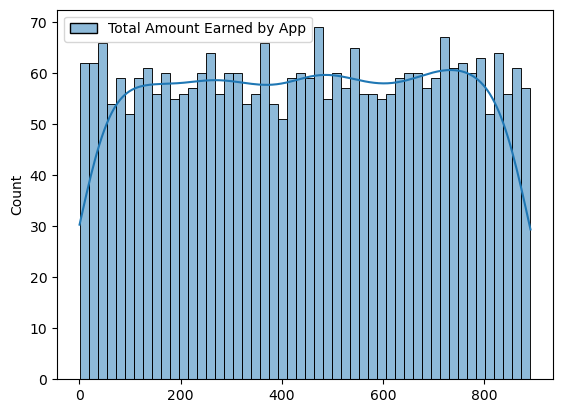

In [20]:
sns.histplot(target, kde=True, bins=50)

<Axes: ylabel='Count'>

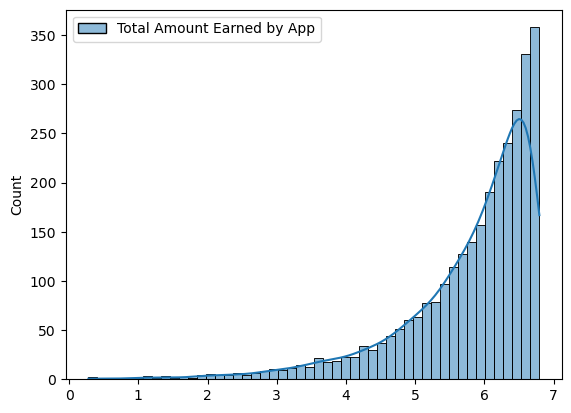

In [21]:
sns.histplot(target_log, kde=True, bins=50)

In [22]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(predictor_num.astype(float), target.astype(float), test_size=0.3, random_state=2024)

In [23]:
X_train.shape

(2061, 16)

In [24]:
x_test.shape

(884, 16)

In [25]:
Y_train.shape

(2061, 1)

In [26]:
y_test.shape

(884, 1)

In [27]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

model1 = lin.fit(X_train, Y_train)

In [28]:
model1.score(x_test,y_test)

1.0

In [29]:
model1.coef_

array([[ 2.49066002e-02,  1.24533001e-03, -8.32667268e-17,
         5.00622665e-01, -4.99377335e-01,  2.41473508e-15,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00]])

In [30]:
model1.intercept_

array([1006.655])

In [31]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(x_test)

model2 = sm.OLS(Y_train, X_train).fit()

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Total Amount Earned by App   R-squared:                       1.000
Model:                                    OLS   Adj. R-squared:                  1.000
Method:                         Least Squares   F-statistic:                 8.685e+27
Date:                        Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                                06:34:57   Log-Likelihood:                 46809.
No. Observations:                        2061   AIC:                        -9.359e+04
Df Residuals:                            2046   BIC:                        -9.350e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1006.6550   5.32e-12   1.89e+14      0.000    1006.655    1006.655
Points Lost by Loser             0.0249   3.89e-11    6.4e+08      0.000       0.025       0.025
Amount Lost by Loser             0.0012   1.95e-12    6.4e+08      0.000       0.001       0.001
Amount Remaining for Loser   -6.106e-15    1.8e-14     -0.339      0.735   -4.14e-14    2.92e-14
Amount to be Credited to App     0.5006   1.12e-09   4.48e+08      0.000       0.501       0.501
Amount Won by Winner            -0.4994   1.11e-09  -4.48e+08      0.000      -0.499      -0.499
Amount Remaining for Winner  -6.301e-15   1.82e-14     -0.347      0.729   -4.19e-14    2.93e-14
Vkfv                            -1.0000   8.89e-14  -1.12e+13      0.000      -1.000      -1.000
Ovti                            -1.0000   6.47e-14  -1.54e+13      0.000      -1.000      -1.000
Ayus                            -1.0000   6.67e-14   -1.5e+13      0.000      -1.000      -1.000
Wvlh                            -1.0000   2.26e-13  -4.43e+12      0.000      -1.000      -1.000
Isba                            -1.0000   4.82e-14  -2.07e+13      0.000      -1.000      -1.000
Zxyw                            -1.0000    8.7e-14  -1.15e+13      0.000      -1.000      -1.000
Vlbz                            -1.0000    6.5e-14  -1.54e+13      0.000      -1.000      -1.000
Kyao                            -1.0000   6.51e-14  -1.54e+13      0.000      -1.000      -1.000
Lizd                            -1.0000   2.01e-13  -4.99e+12      0.000      -1.000      -1.000
Ithn                            -1.0000   1.01e-13  -9.95e+12      0.000      -1.000      -1.000
==============================================================================
Omnibus:                       61.643   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.451
Skew:                           0.109   Prob(JB):                     8.98e-08
Kurtosis:                       2.425   Cond. No.                     3.26e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
round(model2.pvalues, 3)

const                           0.000
Points Lost by Loser            0.000
Amount Lost by Loser            0.000
Amount Remaining for Loser      0.735
Amount to be Credited to App    0.000
Amount Won by Winner            0.000
Amount Remaining for Winner     0.729
Vkfv                            0.000
Ovti                            0.000
Ayus                            0.000
Wvlh                            0.000
Isba                            0.000
Zxyw                            0.000
Vlbz                            0.000
Kyao                            0.000
Lizd                            0.000
Ithn                            0.000
dtype: float64

In [34]:
y_pred = model2.predict(X_test)

In [35]:
def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences**2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

In [36]:
y_test_ravel = np.array(y_test).ravel()
rmse(y_pred,y_test_ravel)

3.3206100764661486e-11

In [37]:
cols = ['Model', 'R-squared value', 'Adjusted.R-squared value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

tmp3 = ({'Model': "Base Linear Model",
        'R-squared value' : model2.rsquared,
        'Adjusted.R-squared value': model2.rsquared_adj,
        'RMSE': round(rmse(y_pred, y_test_ravel),3)})

model2_report = models_report._append(tmp3, ignore_index = True)
model2_report

Model  R-squared value  Adjusted.R-squared value  RMSE
0  Base Linear Model              1.0                       1.0   0.0

In [38]:
y_pred_ravel = np.array(y_pred).ravel()
y_test_ravel = np.array(y_test).ravel()
Result = []

for idx in range(len(y_pred_ravel)):
    predicted_value = y_pred_ravel[idx]
    actual_value = y_test_ravel[idx]
    if round(predicted_value,3) == round(actual_value,3):
        result = 'True'
    else:
        result = 'False'
    Result.append([predicted_value, actual_value, result])


Prediction = pd.DataFrame(Result, columns=['Predicted', 'Actual', 'Result'])

Prediction

Predicted   Actual Result
0      139.373  139.373   True
1      829.717  829.717   True
2      129.372  129.372   True
3      358.743  358.743   True
4      866.997  866.997   True
..         ...      ...    ...
879     55.478   55.478   True
880    195.681  195.681   True
881    829.522  829.522   True
882    174.157  174.157   True
883    137.334  137.334   True

[884 rows x 3 columns]

In [39]:
Prediction['Result'].value_counts()

True    884
Name: Result, dtype: int64

### Relationship between App's earnings and Pool's money flow

In [40]:
matches_df.columns

Index(['Match Number', 'Player 1', 'Player 2', 'Loser', 'Winner',
       'Points Lost by Loser', 'Amount Lost by Loser',
       'Amount Remaining for Loser', 'Amount to be Credited to App',
       'Total Amount Earned by App', 'Amount Won by Winner',
       'Amount Remaining for Winner', 'Vkfv', 'Ovti', 'Ayus', 'Wvlh', 'Isba',
       'Zxyw', 'Vlbz', 'Kyao', 'Lizd', 'Ithn'],
      dtype='object')

In [41]:
matches_df_comparison = matches_df.drop(['Match Number', 'Player 1', 'Player 2', 'Loser', 'Winner',
       'Points Lost by Loser', 'Amount Lost by Loser',
       'Amount Remaining for Loser', 'Amount to be Credited to App','Amount Won by Winner',
       'Amount Remaining for Winner'], axis=1)

In [42]:
sum_all = matches_df_comparison.drop('Total Amount Earned by App', axis=1)

In [43]:
sum_all.shape

(2945, 10)

In [44]:
matches_df_comparison['Amount involved in the pool each match'] = sum_all.sum(axis=1)

In [45]:
matches_df_comparison

Total Amount Earned by App    Vkfv     Ovti    Ayus    Wvlh     Isba  \
0                          0.322  68.825  119.953  83.427  23.269  199.321   
1                          0.472  68.825  119.953  83.427  23.269  201.149   
2                          0.824  68.825  120.803  83.427  23.269  201.149   
3                          1.274  68.825  120.803  83.427  23.269  201.149   
4                          1.656  68.825  120.803  83.427  25.819  201.149   
...                          ...     ...      ...     ...     ...      ...   
2940                     890.994   3.485    3.849   3.878   3.594   82.528   
2941                     891.159   3.485    3.849   3.878   3.594   85.376   
2942                     891.489   3.485    3.849   3.878   3.594   86.311   
2943                     891.526   3.485    3.849   3.878   3.594   84.111   
2944                     891.893   3.485    3.849   3.878   3.594   84.324   

         Zxyw    Vlbz     Kyao    Lizd     Ithn  \
0     170.954  87.724  126.764  14.454  111.964   
1     170.954  85.574  126.764  14.454  111.964   
2     170.954  84.574  126.764  14.454  111.964   
3     172.952  84.574  126.764  12.104  111.964   
4     169.952  84.574  126.764  12.104  111.964   
...       ...     ...      ...     ...      ...   
2940    8.803   1.429    3.943   2.052    2.602   
2941    5.453   1.429    3.943   2.052    2.602   
2942    4.353   1.429    3.943   2.052    2.602   
2943    6.223   1.429    3.943   2.052    2.602   
2944    5.973   1.429    3.943   2.052    2.602   

      Amount involved in the pool each match  
0                                   1006.655  
1                                   1006.333  
2                                   1006.183  
3                                   1005.831  
4                                   1005.381  
...                                      ...  
2940                                 116.163  
2941                                 115.661  
2942                                 115.496  
2943                                 115.166  
2944                                 115.129  

[2945 rows x 12 columns]

(<seaborn.axisgrid.FacetGrid at 0x1cc44d5e350>,
 <seaborn.axisgrid.FacetGrid at 0x1cc3dccf0d0>)

<Figure size 500x500 with 0 Axes>

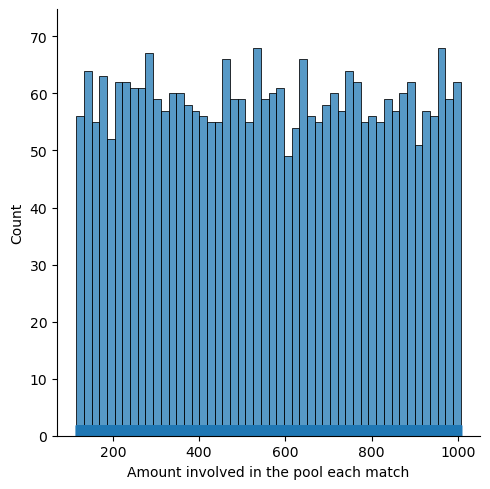

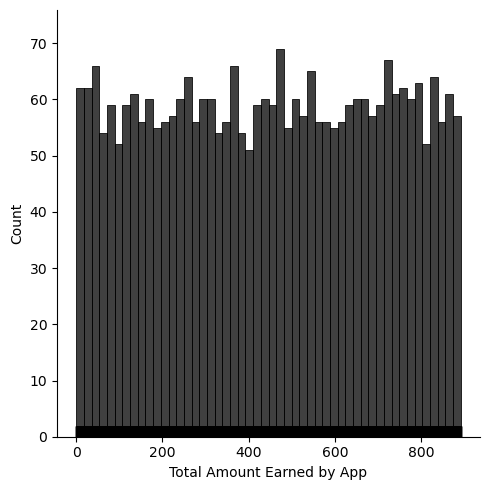

In [46]:
plt.figure(figsize=(5,5))

sns.displot(data=matches_df_comparison, x='Amount involved in the pool each match',rug=True, bins=50), sns.displot(data=matches_df_comparison, x='Total Amount Earned by App', color='black', rug=True, bins=50)

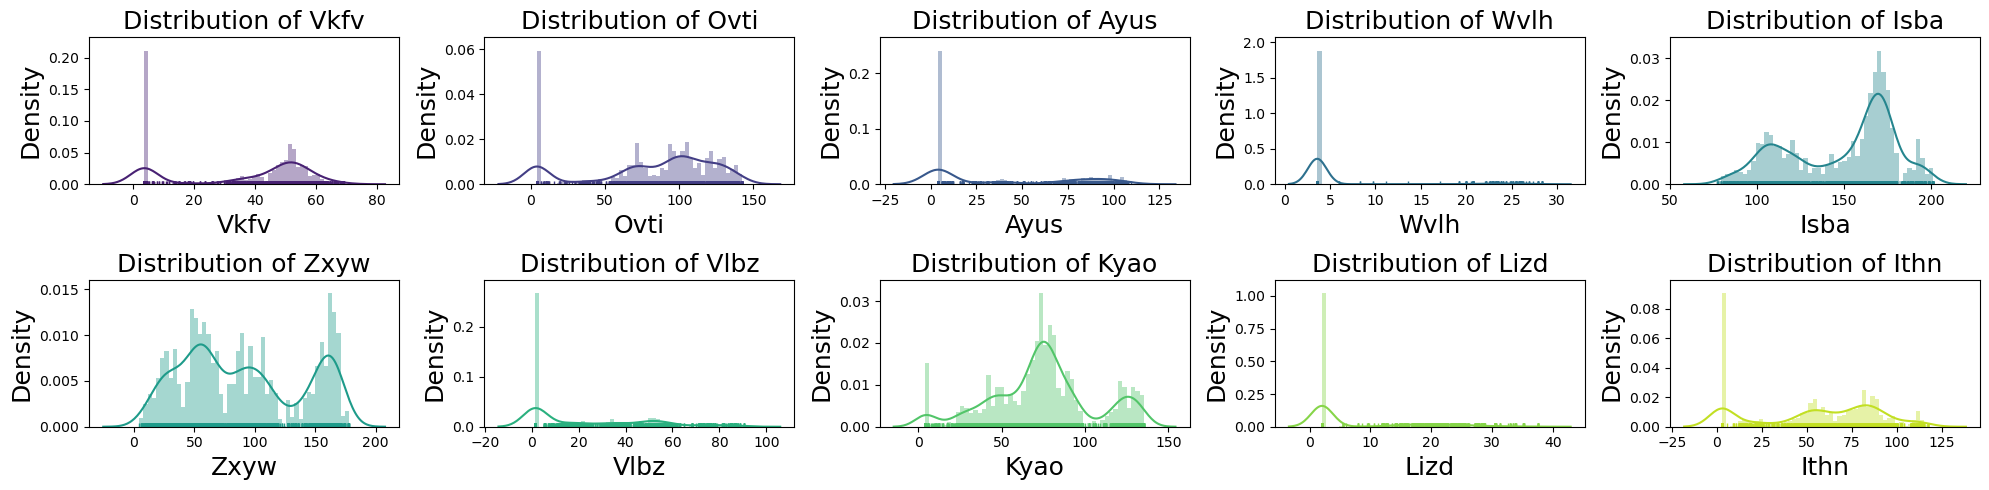

In [47]:
palette = sns.color_palette("viridis", len(sum_all.columns))


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 5))  
axes = axes.flatten()  

for i, (column, color) in enumerate(zip(sum_all.columns, palette)):
    sns.distplot(sum_all[column], ax=axes[i], rug=True, bins=50, color=color,)
    axes[i].set_title(f'Distribution of {column}', fontsize=18)
    axes[i].set_xlabel(column, fontsize=18)
    axes[i].set_ylabel('Density', fontsize=18)


plt.tight_layout()
plt.show()

In [48]:
matches_df_comparison.columns

Index(['Total Amount Earned by App', 'Vkfv', 'Ovti', 'Ayus', 'Wvlh', 'Isba',
       'Zxyw', 'Vlbz', 'Kyao', 'Lizd', 'Ithn',
       'Amount involved in the pool each match'],
      dtype='object')

In [49]:
Percentage_of_earnings_for_app = matches_df_comparison['Total Amount Earned by App'].iloc[-1]/matches_df_comparison['Amount involved in the pool each match'].iloc[0]
Percentage_of_earnings_for_app

0.8859966920146427

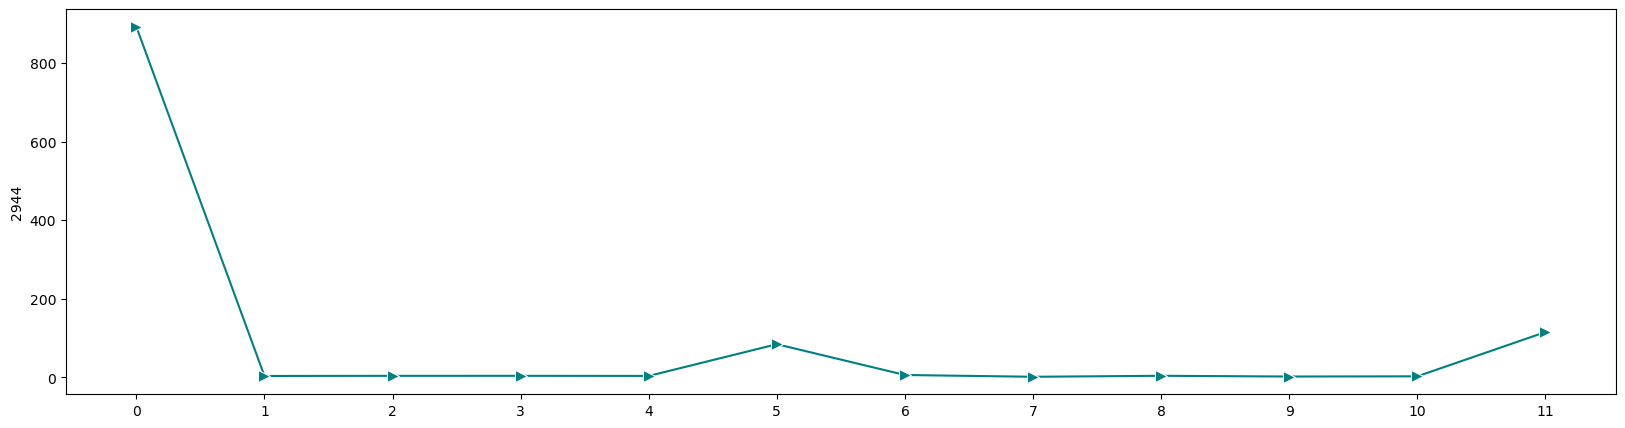

In [50]:
matches_df_comparison_all = matches_df_comparison.copy()
current_columns = matches_df_comparison.columns.tolist()

new_columns = [f"{i}" for i in range(len(current_columns))]

matches_df_comparison_all.columns = new_columns
plt.figure(figsize=(20,5))
sns.lineplot(matches_df_comparison_all.iloc[-1], marker='>', markersize=8, color='teal');

In [51]:
matches_df_comparison.columns[1]

'Vkfv'

In [52]:
matches_df_comparison.columns[0]

'Total Amount Earned by App'

In [53]:
matches_df_comparison.columns[11]

'Amount involved in the pool each match'

In [54]:
%store matches_df

Stored 'matches_df' (DataFrame)


In [55]:
%store number_of_players_in_pool

Stored 'number_of_players_in_pool' (int)


In [56]:
%store totalPlayers

Stored 'totalPlayers' (dict)


In [57]:
players = list(totalPlayers.keys())
players.append('Total Amount Earned by App')

In [58]:
players

['Vkfv',
 'Ovti',
 'Ayus',
 'Wvlh',
 'Isba',
 'Zxyw',
 'Vlbz',
 'Kyao',
 'Lizd',
 'Ithn',
 'Total Amount Earned by App']